# Data Profiling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df1 = df[['Sex','Age']]
df1

,Sex,Age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0
...,...,...
886,male,27.0
887,female,19.0
888,female,NaN
889,male,26.0


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    object 
 1   Age     714 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


# Data Cleansing

In [5]:
df1['Age'].isna().sum()

177

In [6]:
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
df1['Age'].isna().sum()

0

In [7]:
df1.Sex = df1.Sex.map({'male':0,'female':1})

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    int64  
 1   Age     891 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 14.0 KB


# Exploratory Data Analysis

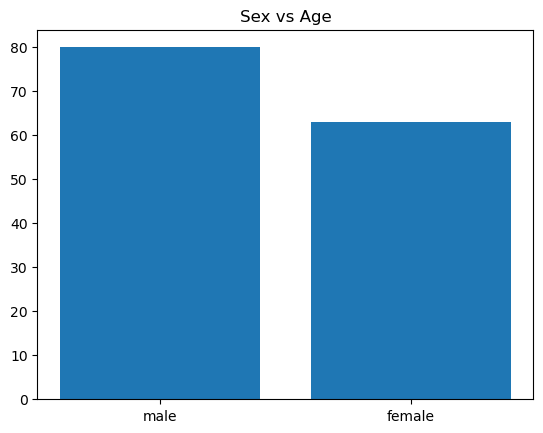

In [9]:
plt.bar(df['Sex'], df['Age'])
plt.title('Sex vs Age')
plt.show()

# Preprocessing Modeling

In [10]:
X = df1.drop(['Age'], axis=1)
y = df1['Age']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

- Fitting into training

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [13]:
regressor.coef_

array([-2.17499716])

- Predict the result

In [14]:
y_pred = regressor.predict(X_test)

- Plot the result

In [15]:
result = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
result

,Actual,Predict
709,28.0,29.952548
439,31.0,29.952548
840,20.0,29.952548
720,6.0,27.777551
39,14.0,27.777551
...,...,...
433,17.0,29.952548
773,28.0,29.952548
25,38.0,27.777551
84,17.0,27.777551


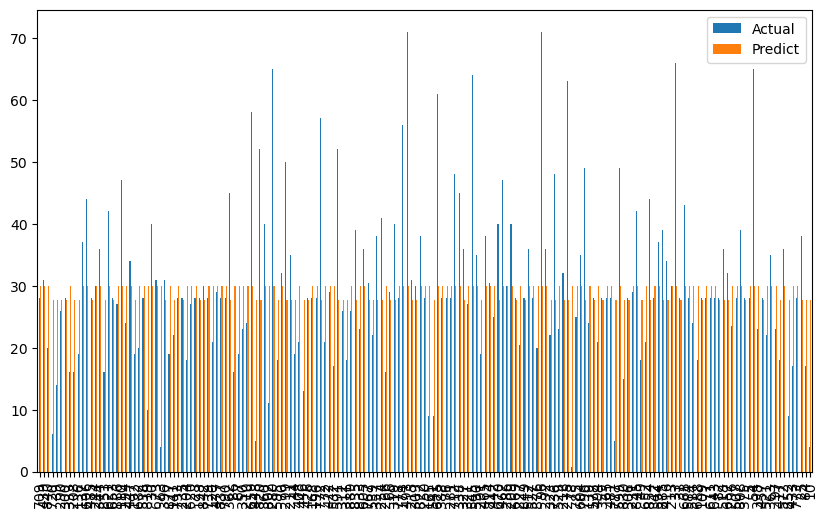

In [16]:
result.plot(kind = 'bar', figsize = (10,6))
plt.show()

# Evaluate Model

In [17]:
mean_absolute_error(y_test, y_pred)

9.358451303289968

In [18]:
mean_absolute_percentage_error(y_test,y_pred)

0.6481603270862951